In [1]:
import os, sys

from keras.applications.vgg16 import VGG16
from keras import backend as K
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
import keras.backend as K

from tqdm import tqdm 

K.clear_session()

# Note that we are including the densely-connected classifier on top;
# all previous times, we were discarding it.
model = VGG16(weights='imagenet')

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [2]:
path_to_right = '../predict_1_imgs/train/right/'
path_to_left = '../predict_1_imgs/train/left/'

In [3]:
def fetch_imgs_top_preds( img_dir ):
    ''' Predict the top elements in an image, save to a dictionary '''
    predictions = {}
    
    imgs = [os.path.join( img_dir, i ) for i in os.listdir( img_dir )]
    for i in tqdm( imgs ):
        img = image.load_img( i, target_size=(224, 224) )
        x = image.img_to_array( img )
        x = np.expand_dims( x, axis=0 )
        x = preprocess_input( x )
        img_preds = model.predict( x )
        
        predictions[i] = decode_predictions( img_preds, top=5 )[0]
    return predictions

In [4]:
left_preds = fetch_imgs_top_preds( path_to_left )

100%|██████████| 4513/4513 [40:18<00:00,  1.92it/s]


In [5]:
right_preds = fetch_imgs_top_preds( path_to_right )

 51%|█████     | 1649/3244 [14:49<13:48,  1.93it/s]/Users/dogrdon/anaconda3/lib/python3.7/site-packages/PIL/Image.py:930: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +
100%|██████████| 3244/3244 [29:16<00:00,  1.82it/s]


In [6]:
left_preds

{'../predict_1_imgs/train/left/57b02cd322e1b956eef1cb44f128d3a1e82603b3.jpg': [('n04584207',
   'wig',
   0.44779122),
  ('n02883205', 'bow_tie', 0.13311994),
  ('n03770439', 'miniskirt', 0.058346897),
  ('n04350905', 'suit', 0.05131678),
  ('n03476991', 'hair_spray', 0.042538233)],
 '../predict_1_imgs/train/left/adc7994b4a123a2bab184f21775efec7e28d5d97.jpg': [('n04263257',
   'soup_bowl',
   0.26928106),
  ('n07590611', 'hot_pot', 0.23412974),
  ('n04596742', 'wok', 0.0864392),
  ('n07579787', 'plate', 0.06067813),
  ('n03259280', 'Dutch_oven', 0.02590473)],
 '../predict_1_imgs/train/left/c267594796fb90a4e9e6ce78ef3446d56e3ad44c.jpg': [('n03630383',
   'lab_coat',
   0.11688018),
  ('n04200800', 'shoe_shop', 0.09082216),
  ('n04532106', 'vestment', 0.06124942),
  ('n04462240', 'toyshop', 0.056815796),
  ('n02883205', 'bow_tie', 0.024059203)],
 '../predict_1_imgs/train/left/c69592a15fa12ff36f58e58ae74878de91b2aa80.jpg': [('n04552348',
   'warplane',
   0.8578645),
  ('n02690373', 'airl

In [7]:
right_preds

{'../predict_1_imgs/train/right/825fc06aa9097beeaf2394a8aa3fefe63e403734.jpg': [('n03670208',
   'limousine',
   0.73445064),
  ('n03444034', 'go-kart', 0.12586112),
  ('n03796401', 'moving_van', 0.037873454),
  ('n03769881', 'minibus', 0.013701742),
  ('n03770679', 'minivan', 0.011148131)],
 '../predict_1_imgs/train/right/4aed80b1693e73be39f65daaf23b181215b43c42.jpg': [('n03485794',
   'handkerchief',
   0.108527884),
  ('n02085620', 'Chihuahua', 0.05314191),
  ('n02364673', 'guinea_pig', 0.052163377),
  ('n02808304', 'bath_towel', 0.04325387),
  ('n03598930', 'jigsaw_puzzle', 0.032331564)],
 '../predict_1_imgs/train/right/e486aa81e4096900432662e574bf5928bb258801.jpg': [('n03452741',
   'grand_piano',
   0.30909982),
  ('n02939185', 'caldron', 0.08451983),
  ('n04296562', 'stage', 0.04562994),
  ('n03447447', 'gondola', 0.045418743),
  ('n03272010', 'electric_guitar', 0.04345875)],
 '../predict_1_imgs/train/right/d0e7dc944431720ca7e6c8410045eb6b875e4c05.jpg': [('n01983481',
   'Americ

In [8]:
import pickle

In [9]:
with open('left_preds_20190601.pickle', 'wb') as lhandle:
    pickle.dump(left_preds, lhandle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('right_preds_20190601.pickle', 'wb') as rhandle:
    pickle.dump(right_preds, rhandle, protocol=pickle.HIGHEST_PROTOCOL)

### Review some image predictions

In [18]:
import itertools
from IPython.display import Image, display

In [21]:
def pred_rendering( data, MAX_ITEMS=10):
    x = itertools.islice(data.items(), 0, MAX_ITEMS)
    for k, v in x:
        display(Image(filename=k)) 
        print(v)

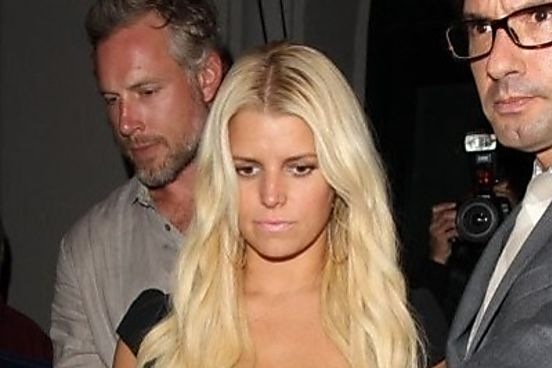

[('n04584207', 'wig', 0.44779122), ('n02883205', 'bow_tie', 0.13311994), ('n03770439', 'miniskirt', 0.058346897), ('n04350905', 'suit', 0.05131678), ('n03476991', 'hair_spray', 0.042538233)]


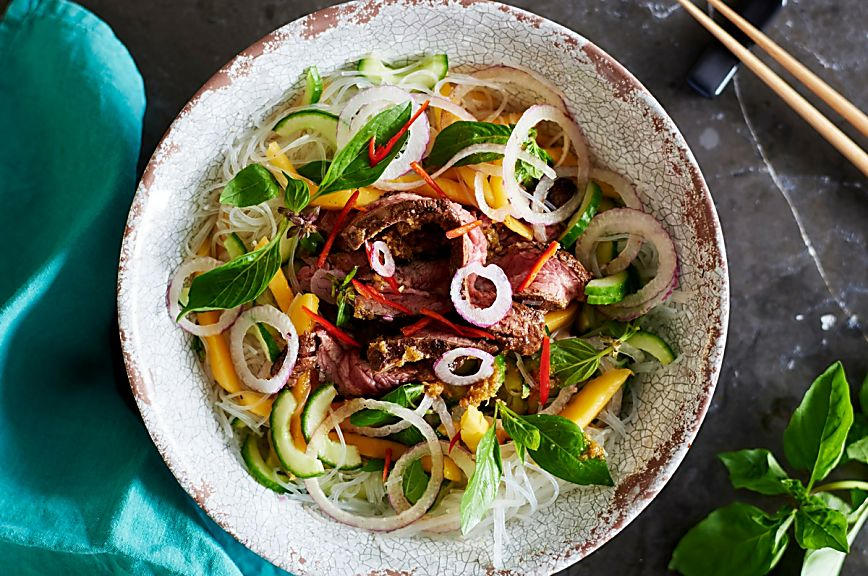

[('n04263257', 'soup_bowl', 0.26928106), ('n07590611', 'hot_pot', 0.23412974), ('n04596742', 'wok', 0.0864392), ('n07579787', 'plate', 0.06067813), ('n03259280', 'Dutch_oven', 0.02590473)]


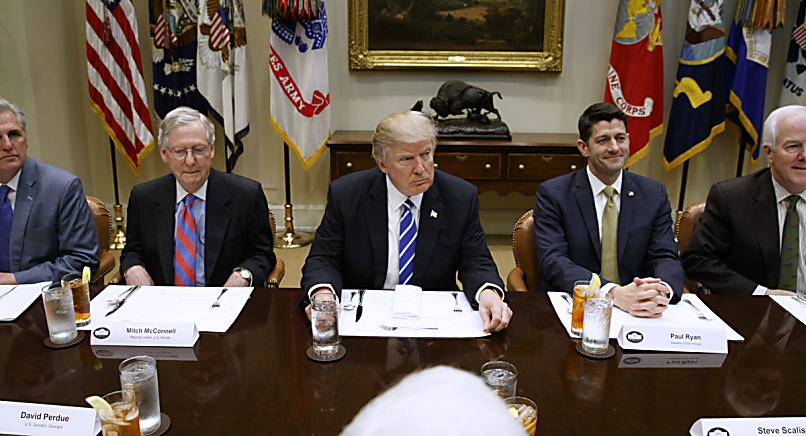

[('n03630383', 'lab_coat', 0.11688018), ('n04200800', 'shoe_shop', 0.09082216), ('n04532106', 'vestment', 0.06124942), ('n04462240', 'toyshop', 0.056815796), ('n02883205', 'bow_tie', 0.024059203)]


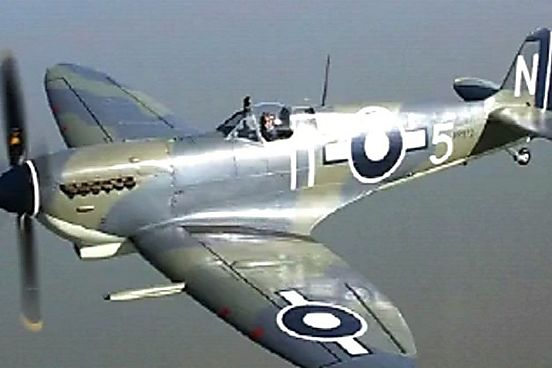

[('n04552348', 'warplane', 0.8578645), ('n02690373', 'airliner', 0.07351274), ('n04592741', 'wing', 0.032491177), ('n02687172', 'aircraft_carrier', 0.026059138), ('n03773504', 'missile', 0.0037294312)]


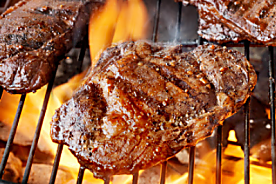

[('n04111531', 'rotisserie', 0.54735756), ('n02927161', 'butcher_shop', 0.08706498), ('n04270147', 'spatula', 0.053367116), ('n02776631', 'bakery', 0.033100545), ('n07871810', 'meat_loaf', 0.028444156)]


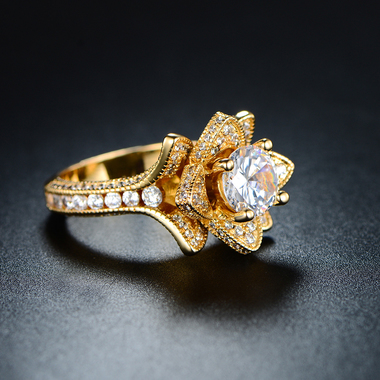

[('n03476684', 'hair_slide', 0.98059803), ('n03814906', 'necklace', 0.015801037), ('n02910353', 'buckle', 0.0016464649), ('n03658185', 'letter_opener', 0.0006255996), ('n02999410', 'chain', 0.0005568955)]


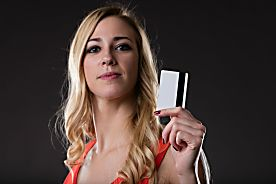

[('n03976657', 'pole', 0.12366085), ('n03759954', 'microphone', 0.12280012), ('n03770439', 'miniskirt', 0.093519814), ('n03710637', 'maillot', 0.07748335), ('n03476991', 'hair_spray', 0.062270723)]


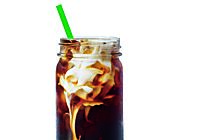

[('n03666591', 'lighter', 0.29052028), ('n04591713', 'wine_bottle', 0.08766835), ('n02823428', 'beer_bottle', 0.08107579), ('n03916031', 'perfume', 0.07592035), ('n03937543', 'pill_bottle', 0.058418874)]


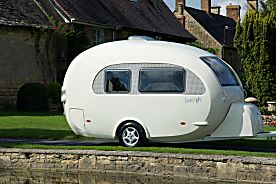

[('n04266014', 'space_shuttle', 0.36564672), ('n04606251', 'wreck', 0.058273), ('n04044716', 'radio_telescope', 0.032066643), ('n03776460', 'mobile_home', 0.027831104), ('n04065272', 'recreational_vehicle', 0.02360438)]


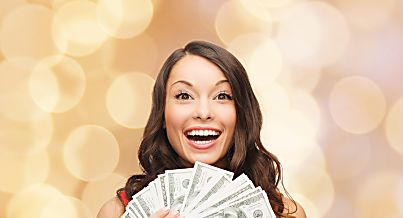

[('n03877472', 'pajama', 0.16213295), ('n02667093', 'abaya', 0.15315433), ('n03450230', 'gown', 0.13052422), ('n03617480', 'kimono', 0.088684835), ('n10148035', 'groom', 0.07062027)]


In [22]:
pred_rendering( left_preds )

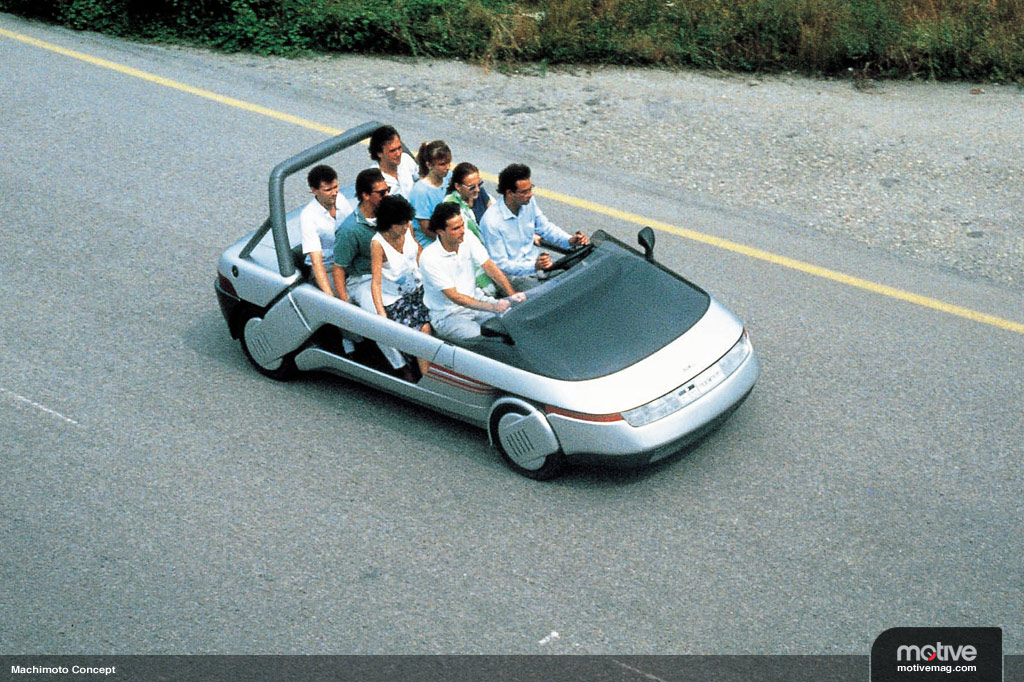

[('n03670208', 'limousine', 0.73445064), ('n03444034', 'go-kart', 0.12586112), ('n03796401', 'moving_van', 0.037873454), ('n03769881', 'minibus', 0.013701742), ('n03770679', 'minivan', 0.011148131)]


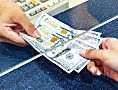

[('n03485794', 'handkerchief', 0.108527884), ('n02085620', 'Chihuahua', 0.05314191), ('n02364673', 'guinea_pig', 0.052163377), ('n02808304', 'bath_towel', 0.04325387), ('n03598930', 'jigsaw_puzzle', 0.032331564)]


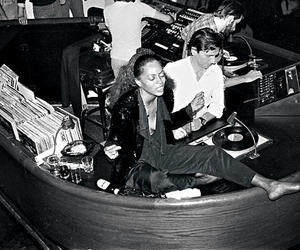

[('n03452741', 'grand_piano', 0.30909982), ('n02939185', 'caldron', 0.08451983), ('n04296562', 'stage', 0.04562994), ('n03447447', 'gondola', 0.045418743), ('n03272010', 'electric_guitar', 0.04345875)]


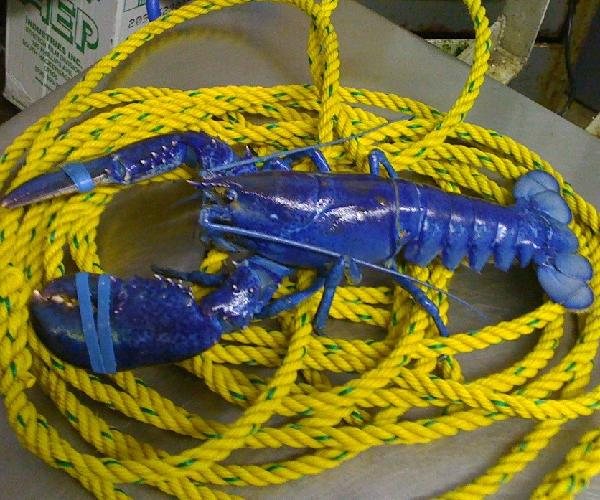

[('n01983481', 'American_lobster', 0.4572594), ('n04367480', 'swab', 0.1576316), ('n03627232', 'knot', 0.13454457), ('n04120489', 'running_shoe', 0.031219441), ('n01770393', 'scorpion', 0.030174803)]


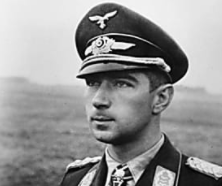

[('n03763968', 'military_uniform', 0.9665886), ('n03929855', 'pickelhaube', 0.017142745), ('n09835506', 'ballplayer', 0.0067707016), ('n02817516', 'bearskin', 0.0033867569), ('n04090263', 'rifle', 0.0022434872)]


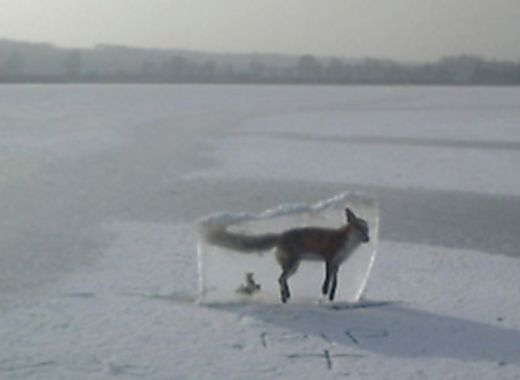

[('n02110185', 'Siberian_husky', 0.090742975), ('n02114855', 'coyote', 0.08123357), ('n02120079', 'Arctic_fox', 0.06509398), ('n02115641', 'dingo', 0.057914194), ('n02120505', 'grey_fox', 0.045632437)]


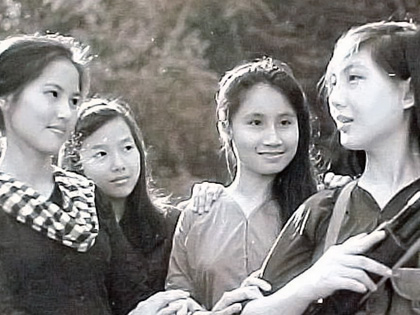

[('n10148035', 'groom', 0.5253031), ('n03617480', 'kimono', 0.12697567), ('n03450230', 'gown', 0.11775639), ('n04456115', 'torch', 0.026215782), ('n03838899', 'oboe', 0.025899881)]


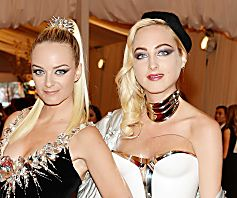

[('n03450230', 'gown', 0.18584166), ('n04584207', 'wig', 0.15200986), ('n02883205', 'bow_tie', 0.10661622), ('n03325584', 'feather_boa', 0.0946406), ('n10148035', 'groom', 0.07849641)]


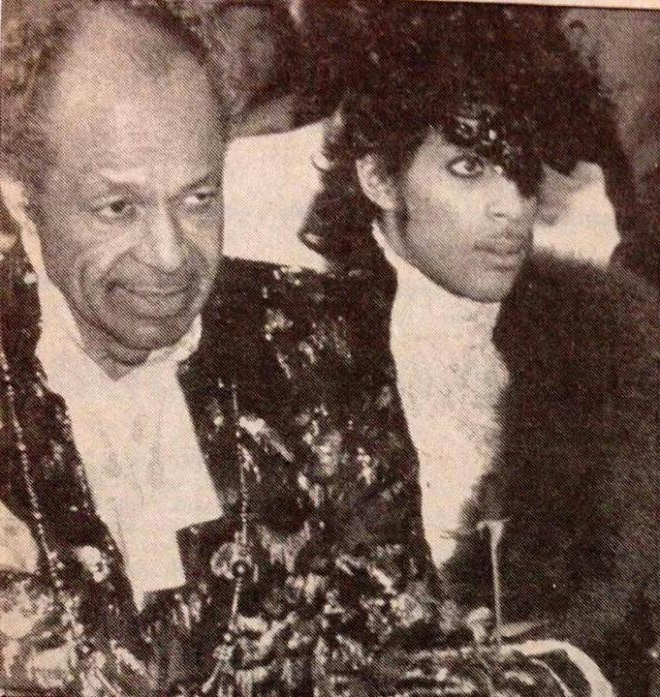

[('n02102973', 'Irish_water_spaniel', 0.4355954), ('n02113799', 'standard_poodle', 0.24299674), ('n02113712', 'miniature_poodle', 0.15311134), ('n02113624', 'toy_poodle', 0.04029492), ('n02093647', 'Bedlington_terrier', 0.017802196)]


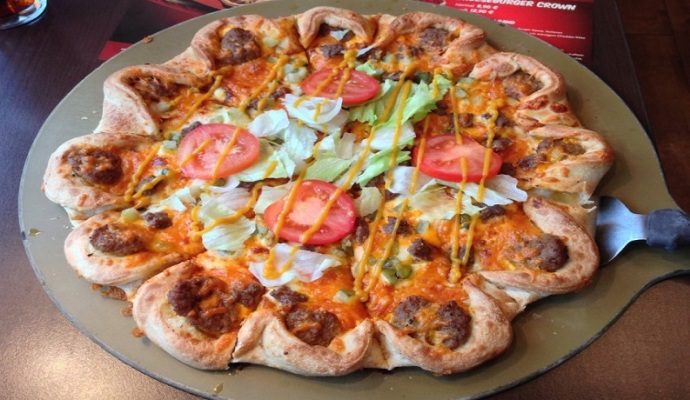

[('n07873807', 'pizza', 0.95603603), ('n07880968', 'burrito', 0.008399304), ('n07583066', 'guacamole', 0.00732912), ('n07760859', 'custard_apple', 0.0065784953), ('n07579787', 'plate', 0.0031918066)]


In [23]:
pred_rendering( right_preds )